# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root"); 

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

RecoJets_R4_pt || si jvf
TrackJets_R4_pt || no jvf
TruthJets_R4_pt || no jvf



<p>The next step is to extract the varibles we want from the dataset. We will explore two jet types: "Reco" (reconstructed from the calorimeter) and "Truth"(particle level). Activate "Event Weight". 

In [4]:
float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;
vector<float> *track_R4_pt;

tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);
tree->SetBranchAddress("TrackJets_R4_pt", &track_R4_pt);

Create Canvas

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Create histograms: Leading jet pT and all jets pT 

In [6]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt = new TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200);

Loop and fill histograms

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt->Fill(reco_R4_pt->at(j)/1000.,evtw);     
    }
    }
}

<p>Draw</p>

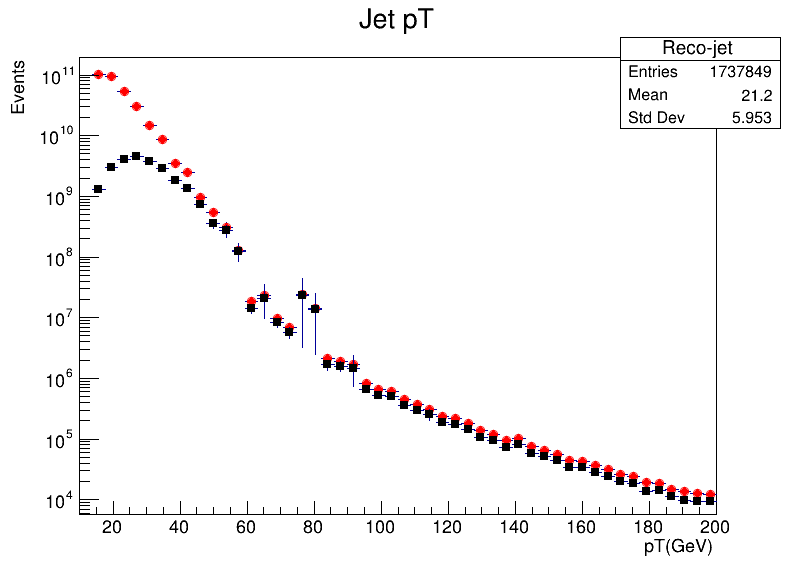

In [8]:
hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

<b>Excercises: 
    1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights.
    2. Repeat for all jets pT.
</b> 
(todo esto solo con R4)

## Ejercicio 1:

In [9]:
TH1F *hist_leadreco_pt_without = new TH1F("Lead Reco-jet without evtw","Leading jet pT; pT(GeV);Events",50,15,200);
TH1F *hist_reco_pt_without = new TH1F("Reco-jet without evtw","Jet pT; pT(GeV);Events",50,15,200);

Cambie el limite inferior de 10 a 15 

In [10]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt_without->Fill(reco_R4_pt->at(0)/1000);  
    for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt_without->Fill(reco_R4_pt->at(j)/1000);     
    }
    }
}

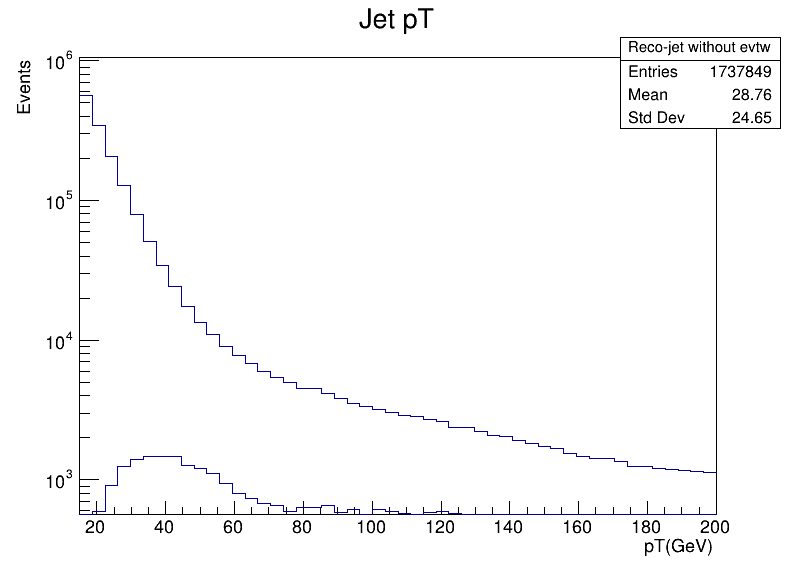

In [11]:
hist_reco_pt_without->SetMarkerStyle(20);
hist_reco_pt_without->SetMarkerColor(kRed);
hist_reco_pt_without->Draw("");
hist_leadreco_pt_without->SetMarkerStyle(21);
hist_leadreco_pt_without->SetMarkerColor(kBlack);
hist_leadreco_pt_without->Draw("same");
canvas->SetLogy();
canvas->Draw();

Ahora si, comparemos los leading Jets

Definamos los histogramas para los Truth Jets pt ( truth_R4_pt ) con y sin EventWeight

In [12]:
TH1F *hist_lead_truth_pt = new TH1F("Lead Truth Jets pt","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt = new TH1F("Truth Jets pt","Jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_lead_truth_pt_without = new TH1F("Lead Truth Jets pt_without","Leading jet pT_without; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt_without = new TH1F("Truth Jets pt_without","Jet pT_without; pT(GeV);Events",50,10,200);

In [13]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(truth_R4_pt->size()>0){
    hist_lead_truth_pt->Fill(truth_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truth_pt->Fill(truth_R4_pt->at(j)/1000.,evtw);     
    }
    }
    
    if(truth_R4_pt->size()>0){
    hist_lead_truth_pt_without->Fill(truth_R4_pt->at(0)/1000.);  
    for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truth_pt_without->Fill(truth_R4_pt->at(j)/1000.);     
    }
    }
}

Como en elejemplo comparemos los leading Jet pt con todos los Jets

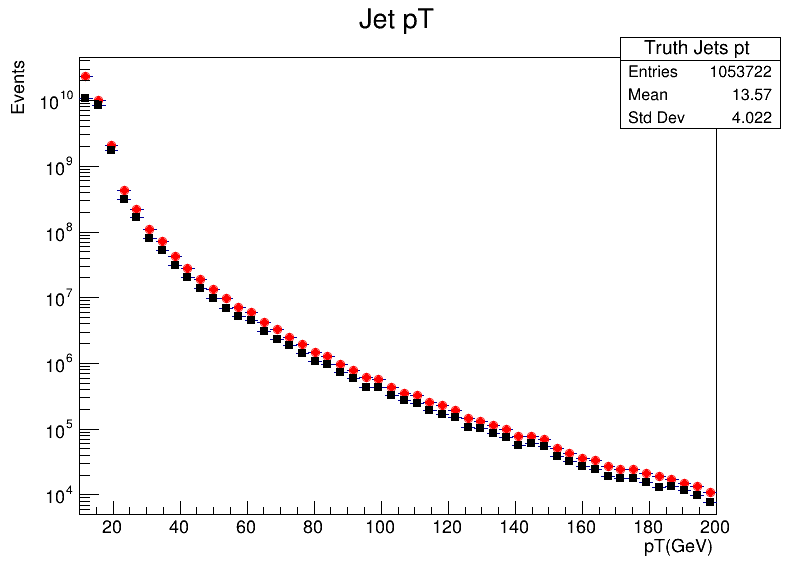

In [14]:
hist_truth_pt->SetMarkerStyle(20);
hist_truth_pt->SetMarkerColor(kRed);
hist_truth_pt->Draw("");
hist_lead_truth_pt->SetMarkerStyle(21);
hist_lead_truth_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

<b> Comparando los 2 leading jets pt con EvenWeight

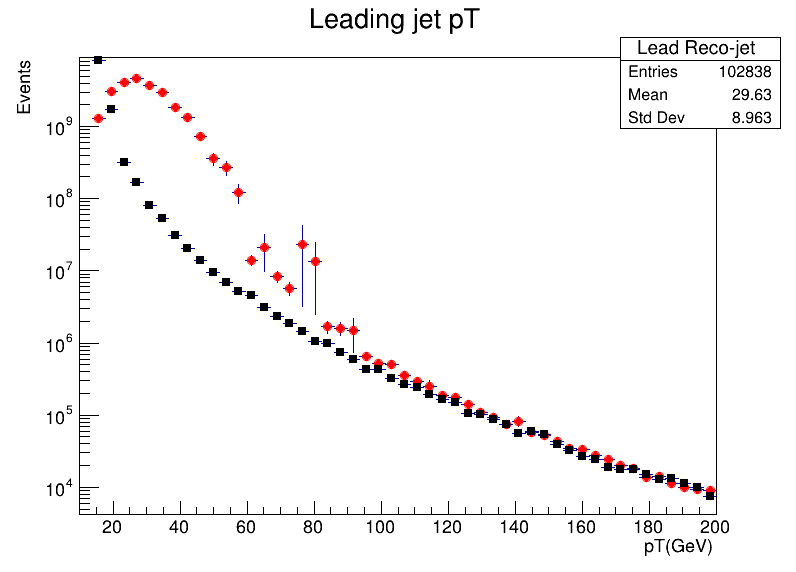

In [15]:
hist_leadreco_pt->SetMarkerStyle(20);
hist_leadreco_pt->SetMarkerColor(kRed);
hist_leadreco_pt->Draw("");
hist_lead_truth_pt->SetMarkerStyle(21);
hist_lead_truth_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

<b> Comparando sin EventWeight </b>

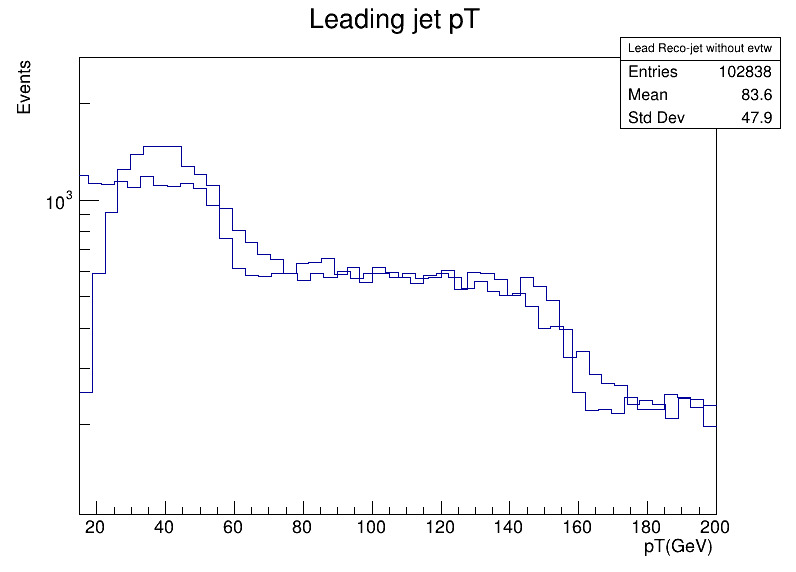

In [16]:
hist_leadreco_pt_without->SetMarkerStyle(20);
hist_leadreco_pt_without->SetMarkerColor(kRed);
hist_leadreco_pt_without->Draw("");
hist_lead_truth_pt_without->SetMarkerStyle(21);
hist_lead_truth_pt_without->Draw("same");
canvas->SetLogy();
canvas->Draw();

<b> 2. Comparando para todos los Jets pt </b> 

In [17]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


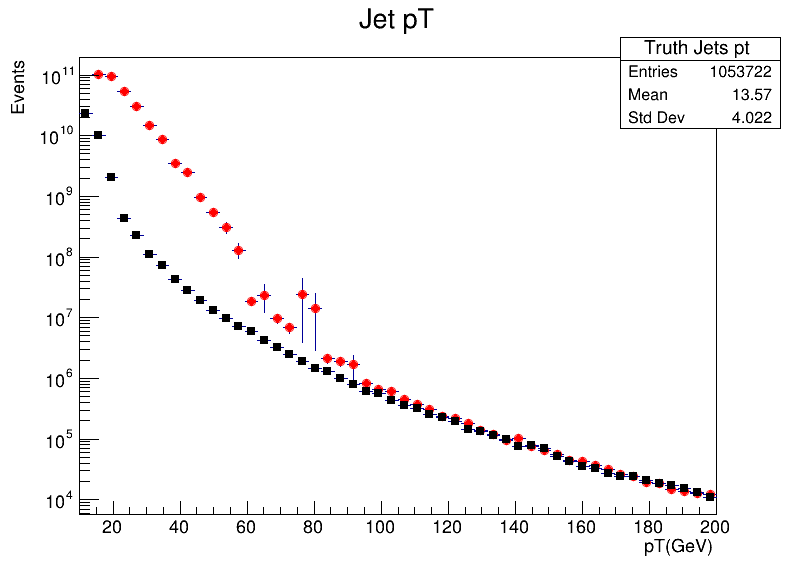

In [18]:
hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw("");
hist_truth_pt->SetMarkerStyle(21);
hist_truth_pt->SetMarkerColor(kBlack);
hist_truth_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

<b> Comparando sin EventWeight </b>

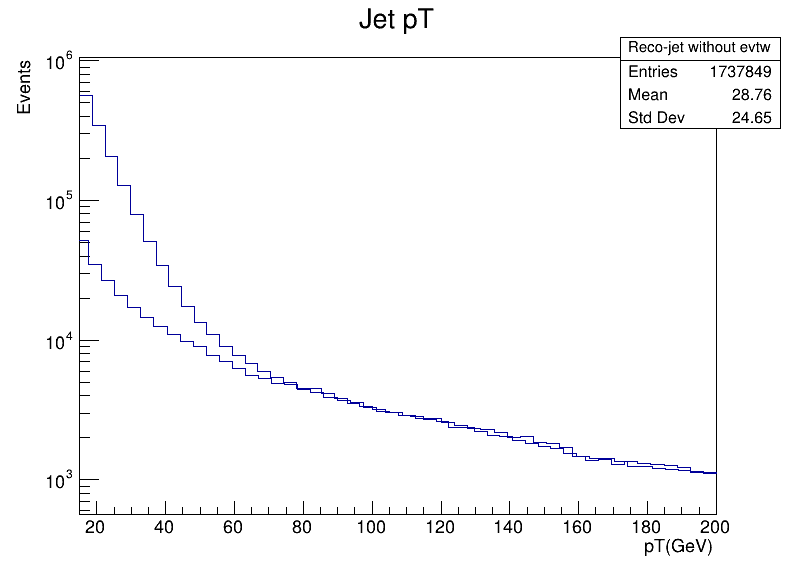

In [19]:
hist_reco_pt_without->SetMarkerStyle(20);
hist_reco_pt_without->SetMarkerColor(kRed);
hist_reco_pt_without->Draw("");
hist_truth_pt_without->SetMarkerStyle(21);
//hist_truth_pt_without->SetMarkerColor(kBlack);
hist_truth_pt_without->Draw("same");
canvas->SetLogy();
canvas->Draw();

<b> .....................

Now we will study the jets pileup dependence 

In [20]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

float mu = -1;
tree->SetBranchAddress("mu_average", &mu);

Plot jet pt vs. pileup

In [21]:
TH2F *hist_jetpt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,100, 20, 0, 200);
TProfile *prof_jetpt_npv = new TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",50,1,100, 0, 200);


Fill the histograms: Make a cut to accept events with at least one jet and require the leading jet to have pT above 20 GeV

In [22]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
        hist_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        prof_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
}

In [23]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

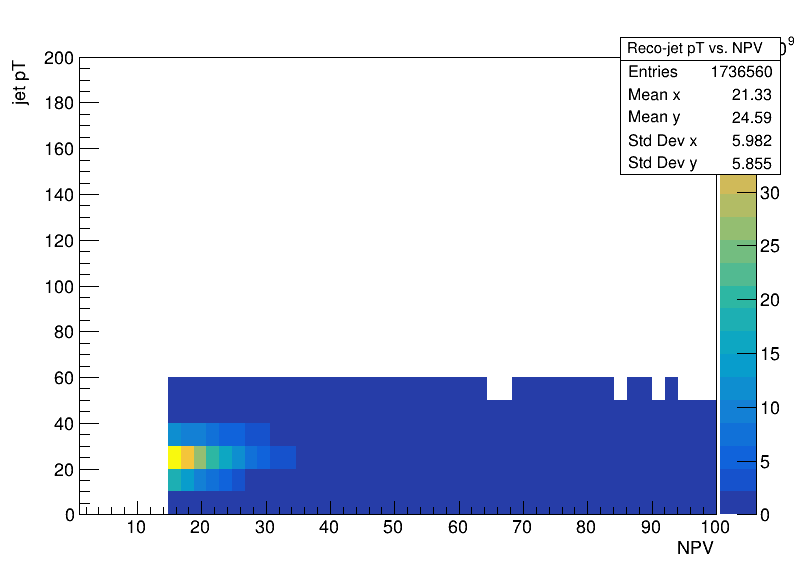

In [24]:
hist_jetpt_npv->Draw("colz");
canvas2->Draw();

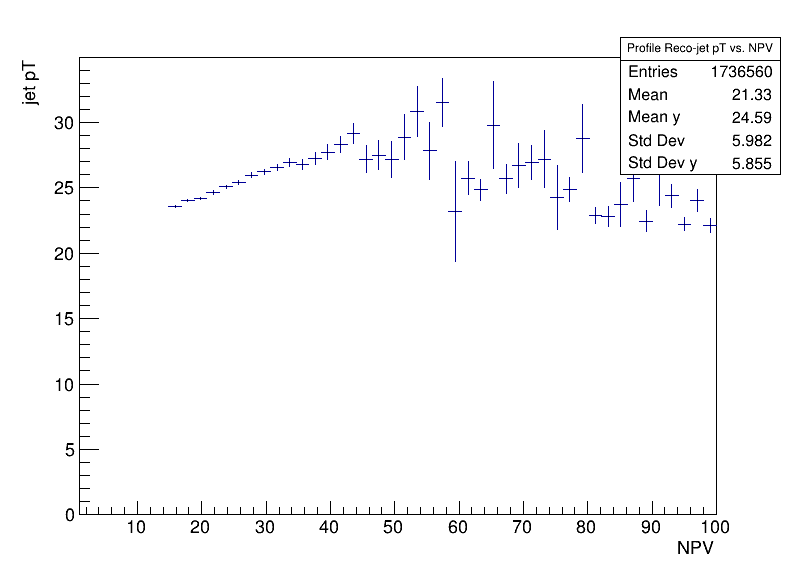

In [25]:
prof_jetpt_npv->Draw("");
canvas2->Draw();

<b>Excercise: 
3. Make plots for reco and truth jet pT vs. pileup. Interpret your results. 
</b>

<b> Definamos y llenemos los histtogramas de reco and truth jet pT vs npv y mu_average </b>

In [26]:
TH2F *hist_truth_jetpt_npv = new TH2F("Truth-jet pT vs. NPV",";NPV; truth_jet pT",50,1,100, 20, 0, 200);
TProfile *prof_truth_jetpt_npv = new TProfile("Profile Truth-jet pT vs. NPV",";NPV; truth_jet pT",50,1,100, 0, 200);

TH2F *hist_jetpt_mu = new TH2F("Reco-jet pT vs. mu_average",";mu_average; jet pT",50,1,100, 20, 0, 200);
TProfile *prof_jetpt_mu = new TProfile("Profile Reco-jet pT vs. mu_average",";mu_average; jet pT",50,1,100, 0, 200);

TH2F *hist_truth_jetpt_mu = new TH2F("Truth-jet pT vs. mu_average",";mu_average; truth_jet pT",50,1,100, 20, 0, 200);
TProfile *prof_truth_jetpt_mu = new TProfile("Profile Truth-jet pT vs. mu_average",";mu_average; truth_jet pT",50,1,100, 0, 200);

In [27]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truth_jetpt_npv->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        prof_truth_jetpt_npv->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
        hist_jetpt_mu->Fill(reco_R4_pt->at(j)/1000.,mu,evtw);
        prof_jetpt_mu->Fill(reco_R4_pt->at(j)/1000.,mu,evtw);
        }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truth_jetpt_mu->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        prof_truth_jetpt_mu->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        }
    }    
    
}

<b> Veamos como quedaria para los truth jet pT vs NPV </b>

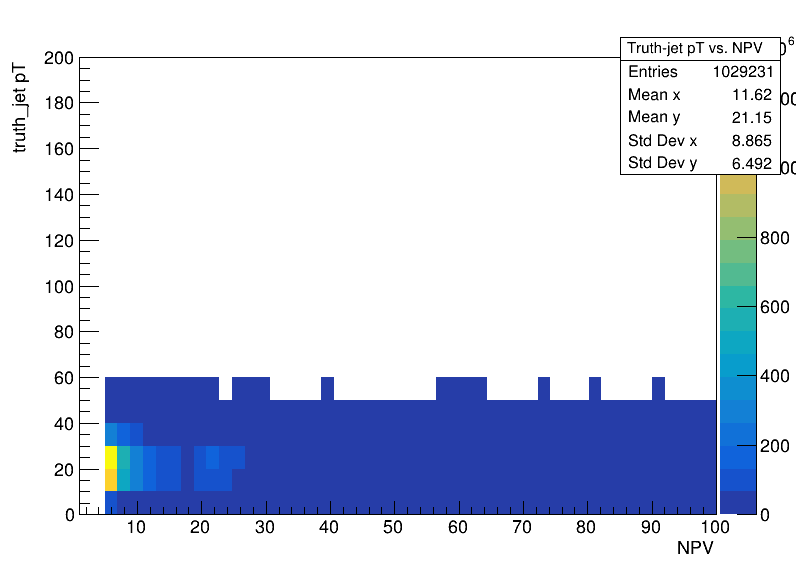

In [28]:
hist_truth_jetpt_npv->Draw("colz");
canvas2->Draw();

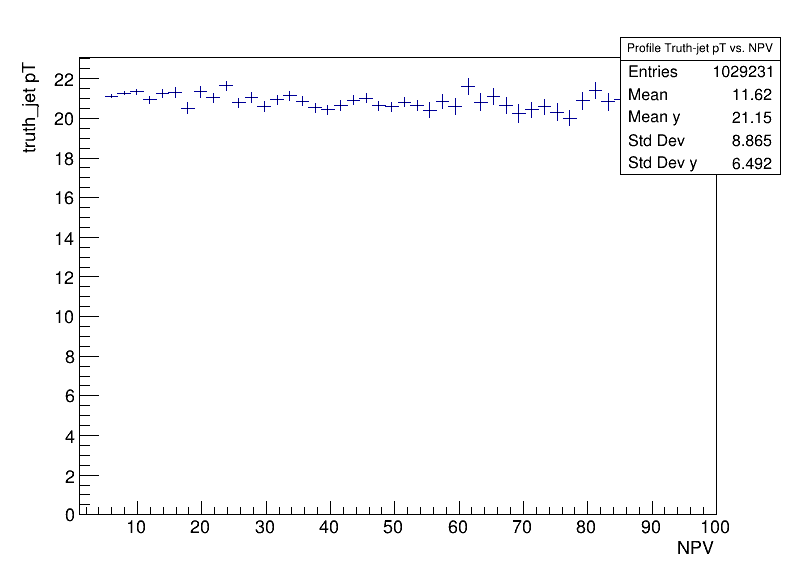

In [29]:
prof_truth_jetpt_npv->Draw("");
canvas2->Draw();

<b> Veamos como quedaria para los reco jet pT vs mu_average  </b>    

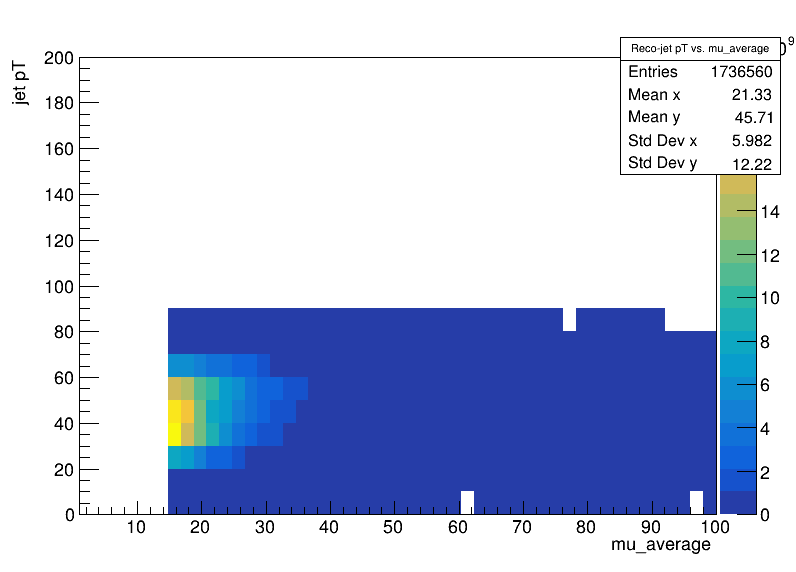

In [30]:
hist_jetpt_mu->Draw("colz");
canvas2->Draw();

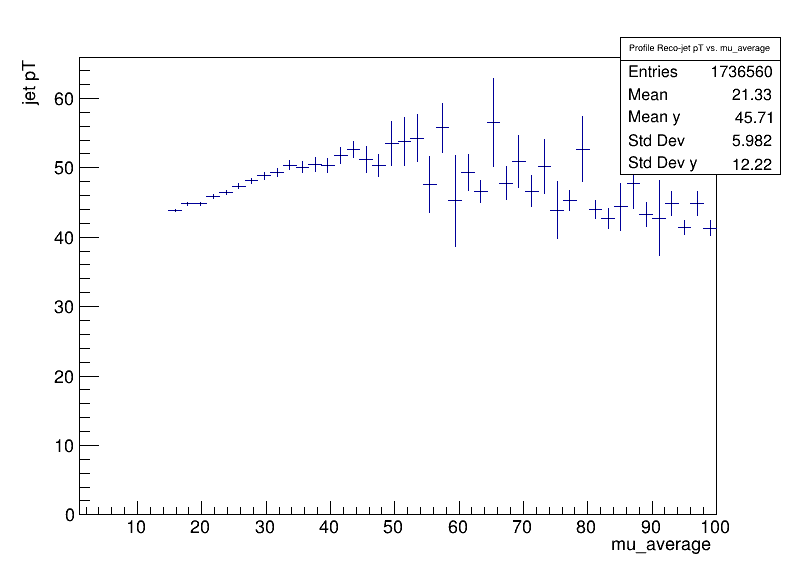

In [31]:
prof_jetpt_mu->Draw("");
canvas2->Draw();

<b> Veamos como quedaria para los reco jet pT vs mu_average  </b>    

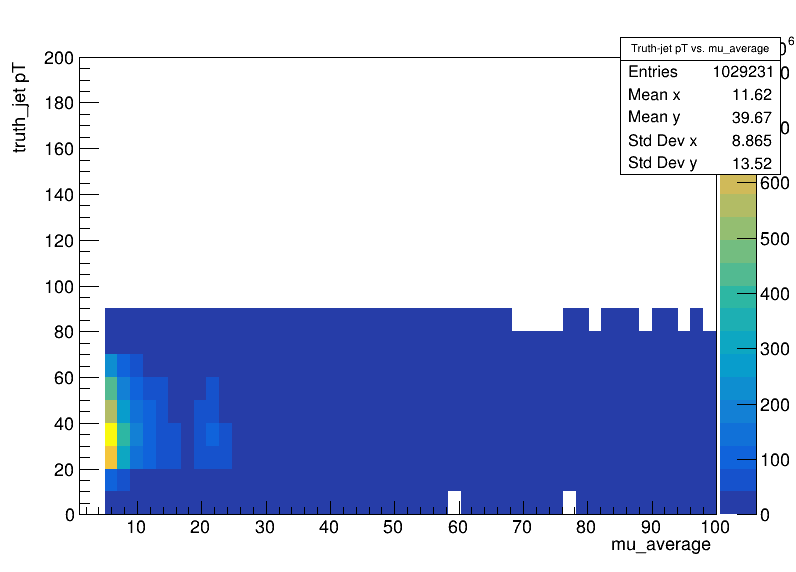

In [32]:
hist_truth_jetpt_mu->Draw("colz");
canvas2->Draw();

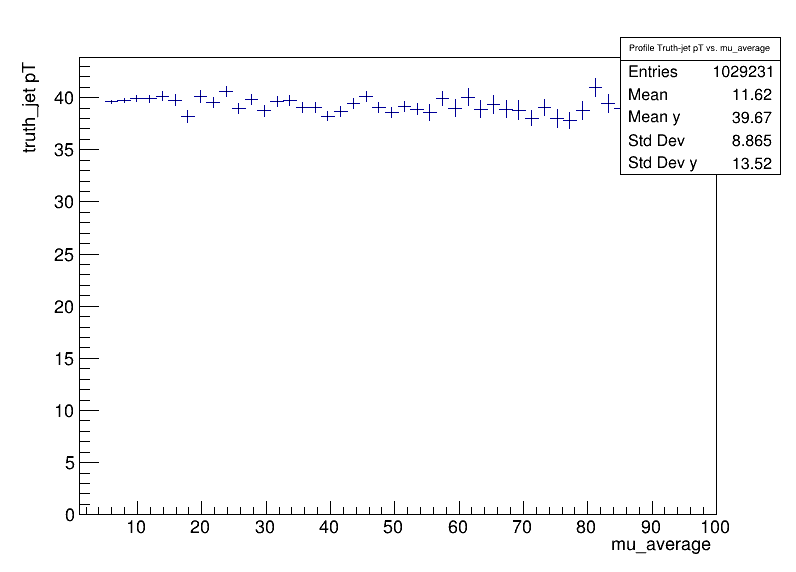

In [33]:
prof_truth_jetpt_mu->Draw("");
canvas2->Draw();

<b> Interpretacion: Claramente a diferencia de los reco Jets, los truth Jets son estables antes el pileup, lo cualno es demasiado extraño, ya que si son los Jets reconstruidos como las particulas que realmente existieron es de esperar que no se vea afectado por fenomenos de ruido como lo es el pileup </b>     

<b> --------------------------------------------------------------------------------------------------------- </b>     

Plot the JVF (Jet Vertex Fraction) variable

In [34]:
vector<float> *reco_R4_jvf;

tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);

In [35]:
TH1F *hist_leadreco_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);
TH1F *hist_leadreco100_jvf = new TH1F("Lead Reco-jet JVF 100","Leading jet JVF; JVF;Events",20,-1,1);

In [36]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        hist_leadreco_jvf->Fill(reco_R4_jvf->at(0), evtw);
        if(reco_R4_pt->at(0)>100000.){hist_leadreco100_jvf->Fill(reco_R4_jvf->at(0), evtw);}
        
    }
}

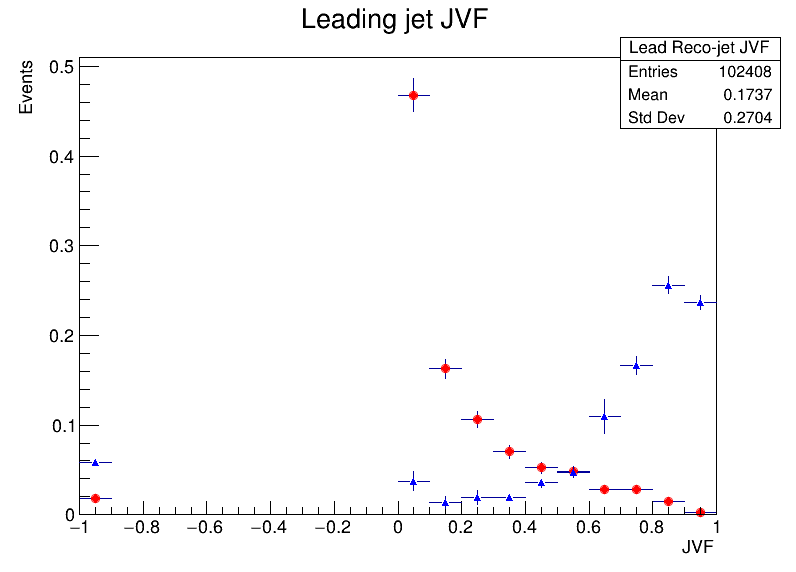

In [37]:
hist_leadreco_jvf->SetMarkerStyle(20);
hist_leadreco_jvf->SetMarkerColor(kRed);
hist_leadreco_jvf->DrawNormalized("");
hist_leadreco100_jvf->SetMarkerStyle(22);
hist_leadreco100_jvf->SetMarkerColor(kBlue);
hist_leadreco100_jvf->DrawNormalized("same");
canvas2->Draw();

## Excercise: 


<b>
4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut) 
5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup 
</b>

Definamos y llenemos los histogramas con el corte |JVF|>0.5

In [38]:
TCanvas *canvas4 = new TCanvas("Canvas4","",800,600);

In [39]:
TH1F *hist_leadreco_pt_JVF05 = new TH1F("Lead Reco-jet_JVF05","Leading jet pT_JVF05; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt_JVF05 = new TH1F("Reco-jet_JVF05","Jet pT_JVF05; pT(GeV);Events",50,10,200);

In [40]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0 && reco_R4_jvf->at(0)>0.5){
    hist_leadreco_pt_JVF05->Fill(reco_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt_JVF05->Fill(reco_R4_pt->at(j)/1000.,evtw);     
    }
    }
}

<b> Recordar comparativa de Trutht Jets con reco Jets pt sin el corte |JVF|>0.5

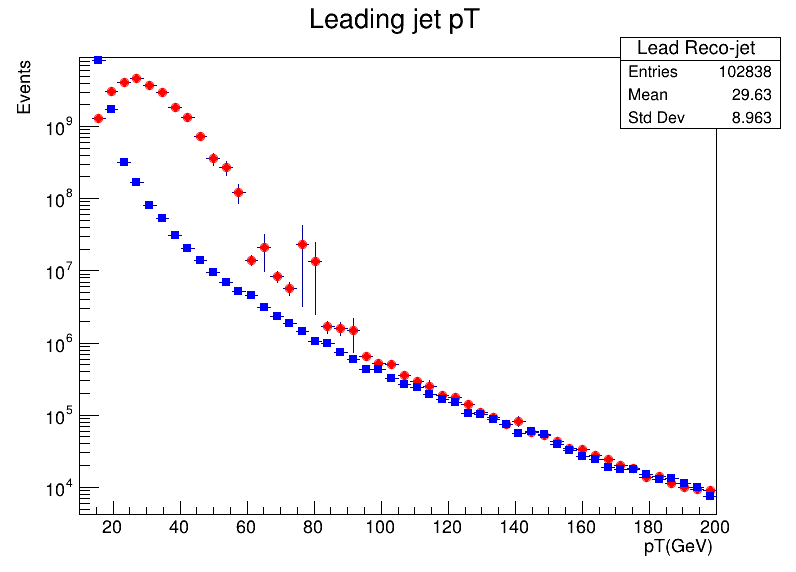

In [41]:
hist_leadreco_pt->SetMarkerStyle(20);
hist_leadreco_pt->SetMarkerColor(kRed);
hist_leadreco_pt->Draw("");
hist_lead_truth_pt->SetMarkerStyle(21);
hist_lead_truth_pt->SetMarkerColor(kBlue);
hist_lead_truth_pt->Draw("same");
canvas4->SetLogy();
canvas4->Draw();

<b>Comparando Trutht Jets con reco Jets pt con el corte |JVF|>0.5

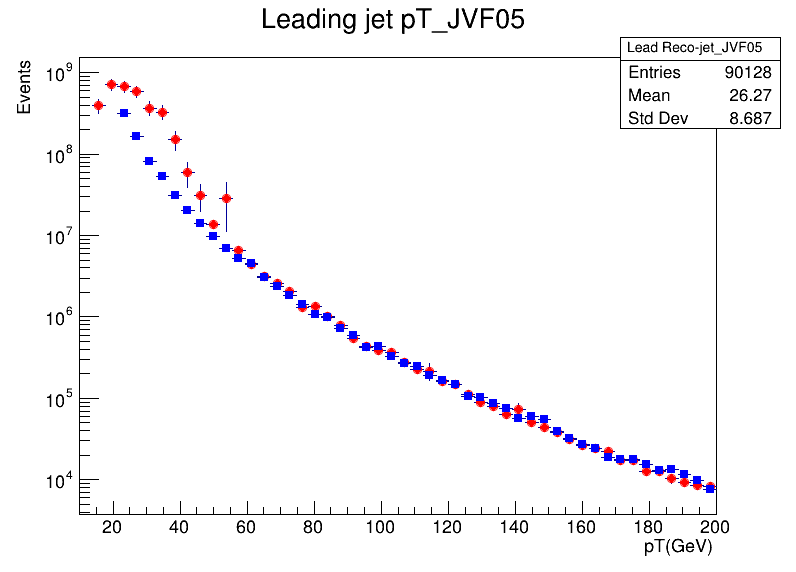

In [42]:
hist_leadreco_pt_JVF05->SetMarkerStyle(20);
hist_leadreco_pt_JVF05->SetMarkerColor(kRed);
hist_leadreco_pt_JVF05->Draw("");
hist_lead_truth_pt->SetMarkerStyle(21);
hist_lead_truth_pt->SetMarkerColor(kBlue);
hist_lead_truth_pt->Draw("same");
canvas4->SetLogy();
canvas4->Draw();

<b> Por curiosidad, veamos como queda la comparacion para todos los jets pt </b> 

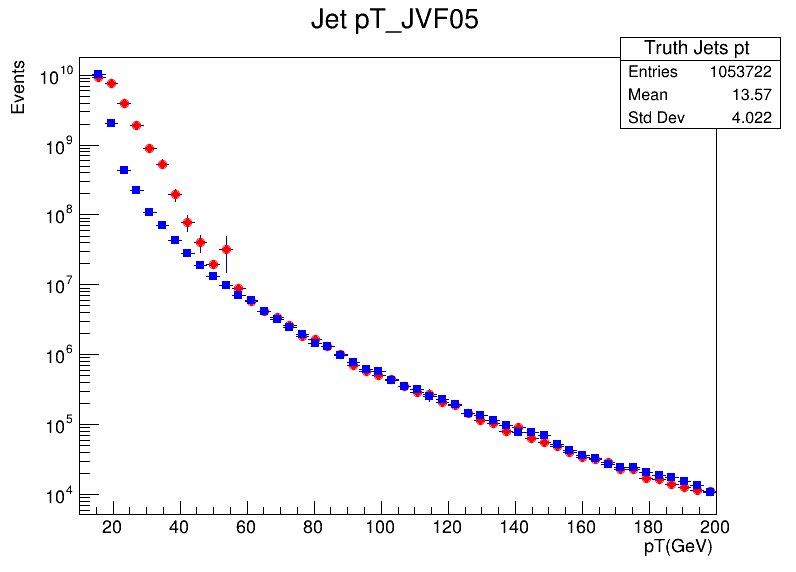

In [43]:
hist_reco_pt_JVF05->SetMarkerStyle(20);
hist_reco_pt_JVF05->SetMarkerColor(kRed);
hist_reco_pt_JVF05->Draw("");
hist_truth_pt->SetMarkerStyle(21);
hist_truth_pt->SetMarkerColor(kBlue);
hist_truth_pt->Draw("same");
canvas4->SetLogy();
canvas4->Draw();

<b> 5. Veamos ahora la  comparacion con los track_R4_pt <b/>
    
    "5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup" 


In [44]:
TCanvas *canvasa = new TCanvas("Canvasa","",800,600);

In [45]:
TH2F *hist_track_jetpt_npv = new TH2F("Track-jet pT vs. NPV",";NPV; track_jet pT",50,1,100, 20, 0, 200);
TProfile *prof_track_jetpt_npv = new TProfile("Profile Track-jet pT vs. NPV",";NPV; track_jet pT",50,1,100, 0, 200);

TH2F *hist_track_jetpt_mu_average = new TH2F("Track-jet pT vs. mu_average",";mu_average; track_jet pT",50,1,100, 20, 0, 200);
TProfile *prof_track_jetpt_mu_average = new TProfile("Profile Track-jet pT vs. mu_average",";mu_average; track_jet pT",50,1,100, 0, 200);

In [46]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(track_R4_pt->size()!=0 && track_R4_pt->at(0)>20000.){
        for(int j=0; j<track_R4_pt->size(); j++){
        hist_track_jetpt_npv->Fill(track_R4_pt->at(j)/1000.,npv,evtw);
        prof_track_jetpt_npv->Fill(track_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
    
    if(track_R4_pt->size()!=0 && track_R4_pt->at(0)>20000.){
        for(int j=0; j<track_R4_pt->size(); j++){
        hist_track_jetpt_mu_average->Fill(track_R4_pt->at(j)/1000.,mu,evtw);
        prof_track_jetpt_mu_average->Fill(track_R4_pt->at(j)/1000.,mu,evtw);
        }
    }   
    
}

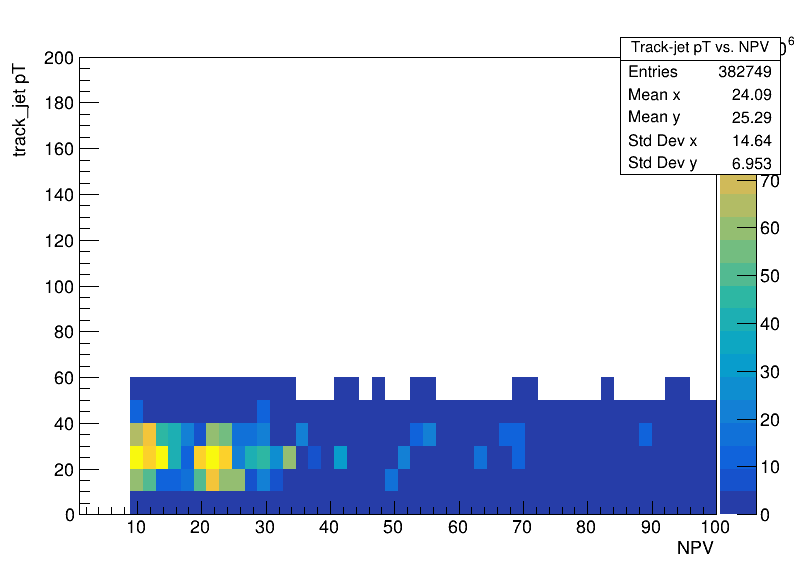

In [47]:
hist_track_jetpt_npv->Draw("colz");
canvasa->Draw()

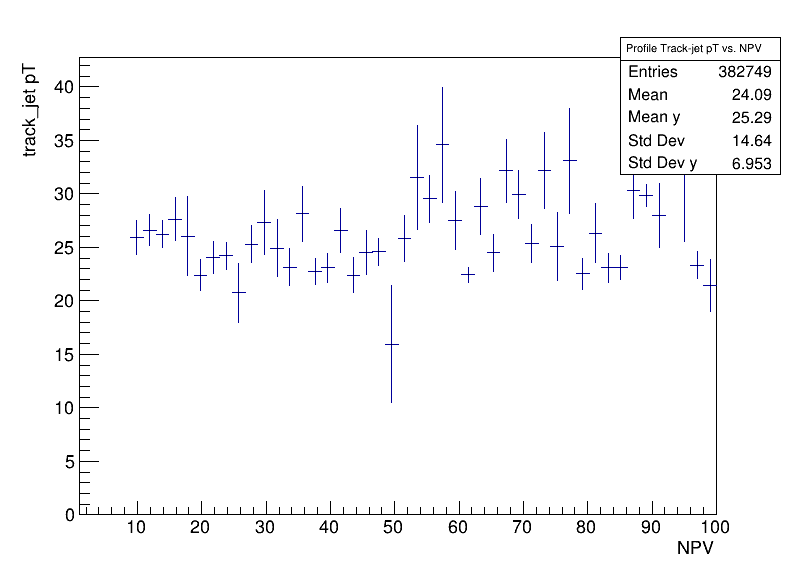

In [48]:
prof_track_jetpt_npv->Draw("");
canvasa->Draw();

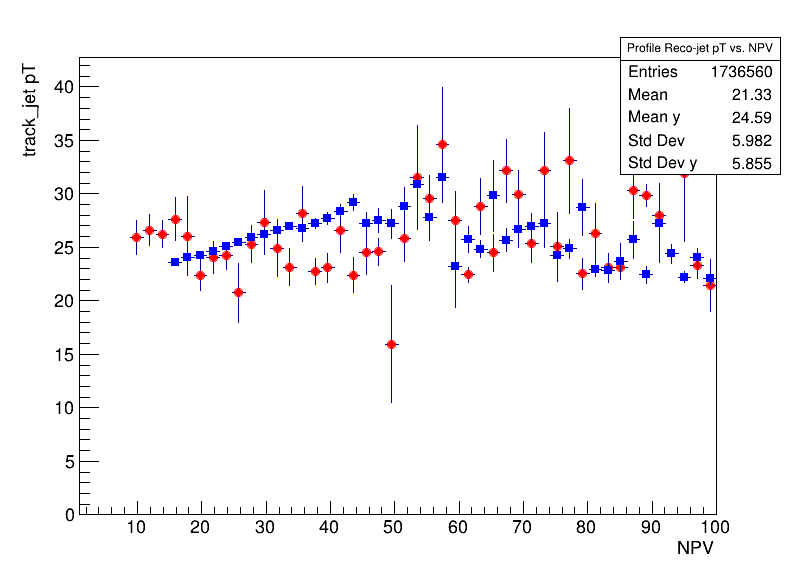

In [49]:
prof_track_jetpt_npv->SetMarkerStyle(20);
prof_track_jetpt_npv->SetMarkerColor(kRed);
prof_track_jetpt_npv->Draw("");
prof_jetpt_npv->SetMarkerStyle(21);
prof_jetpt_npv->SetMarkerColor(kBlue);
prof_jetpt_npv->Draw("same");
canvasa->Draw();

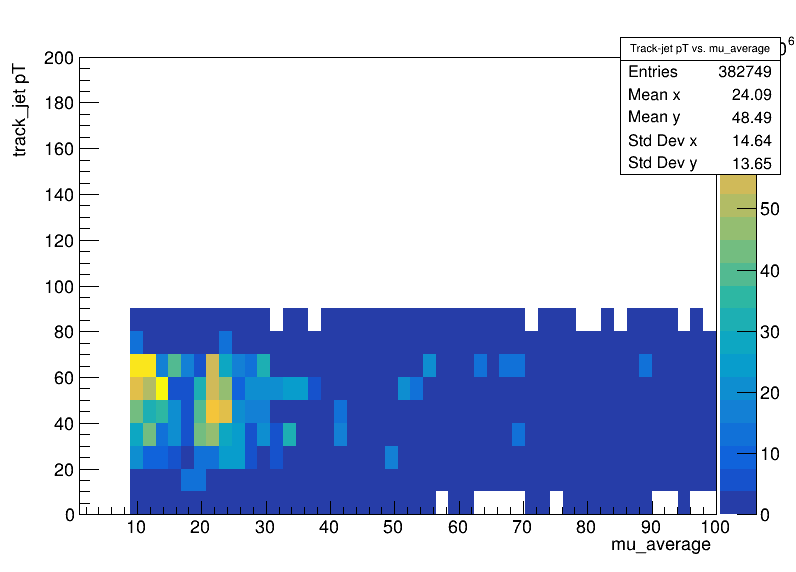

In [50]:
hist_track_jetpt_mu_average->Draw("colz");
canvasa->Draw();

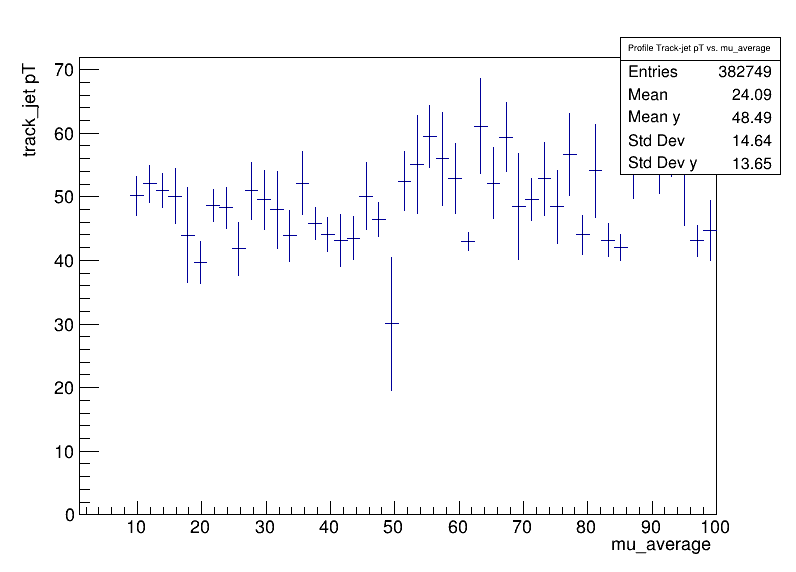

In [51]:
prof_track_jetpt_mu_average->Draw("");
canvasa->Draw();

<b> comparemos ahora los reco Jets y los track Jets

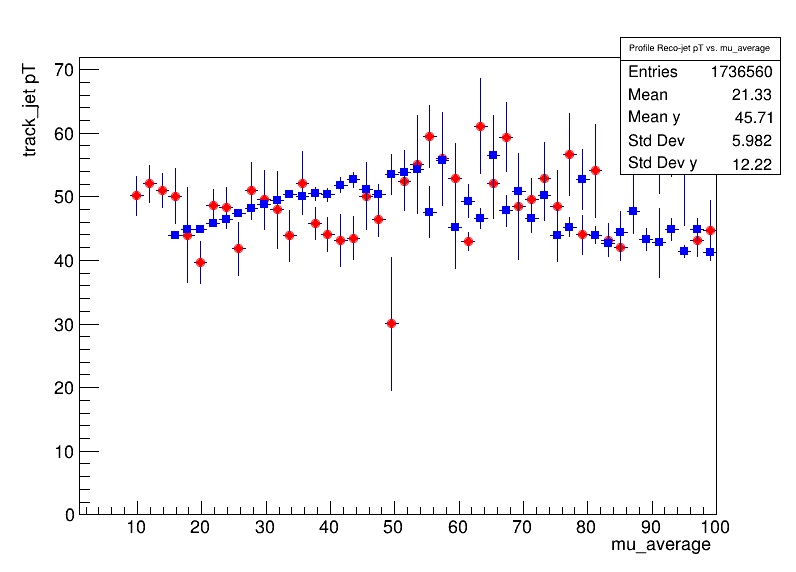

In [52]:
prof_track_jetpt_mu_average->SetMarkerStyle(20);
prof_track_jetpt_mu_average->SetMarkerColor(kRed);
prof_track_jetpt_mu_average->Draw("");
prof_jetpt_mu->SetMarkerStyle(21);
prof_jetpt_mu->SetMarkerColor(kBlue);
prof_jetpt_mu->Draw("same");
canvasa->Draw();

<b>Excercise: 
6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets 
</b>

In [53]:
TCanvas *canvas5 = new TCanvas("Canvas5","",800,600);

In [54]:
TH1F *hist_leadtrack_pt = new TH1F("Lead Track-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_track_pt = new TH1F("Track-jet","Jet pT; pT(GeV);Events",50,10,200);

In [55]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(track_R4_pt->size()>0 && npv>0){
    hist_leadtrack_pt->Fill(track_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<track_R4_pt->size(); j++){
        hist_track_pt->Fill(track_R4_pt->at(j)/1000.,evtw);     
    }
    }
}

<b>Comparando T Trutht Jets pt con tracks Jets pt sin el corte |JVF|>0.5

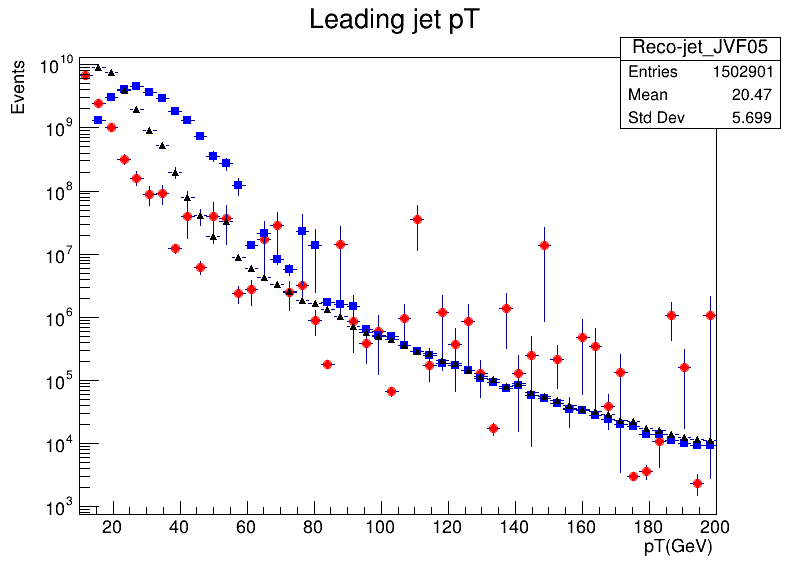

In [56]:
hist_leadtrack_pt->SetMarkerStyle(20);
hist_leadtrack_pt->SetMarkerColor(kRed);
hist_leadtrack_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->SetMarkerColor(kBlue);
hist_leadreco_pt->Draw("same");
hist_reco_pt_JVF05->SetMarkerStyle(22);
hist_reco_pt_JVF05->SetMarkerColor(kBlack);
hist_reco_pt_JVF05->Draw("same");
canvas5->SetLogy();
canvas5->Draw();

Now we will study the jet response: the ratio between the pT of the jet to the truth jet. First we should "match" the jets and the truth jets. We will use the distance DeltaR between the two, but first we should define them as four-vectors:

In [57]:
TCanvas *canvas6 = new TCanvas("Canvas6","",800,600);

In [58]:
vector<float> *reco_R4_eta;
vector<float> *reco_R4_phi;
vector<float> *reco_R4_m;

vector<float> *truth_R4_eta;
vector<float> *truth_R4_phi;
vector<float> *truth_R4_m;

tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);

In [59]:
TH1F *hist_DR_reco_truth = new TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,2);

In [60]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_truth->Fill(truthJet.DeltaR(recoJet),evtw);
    }
    }
}

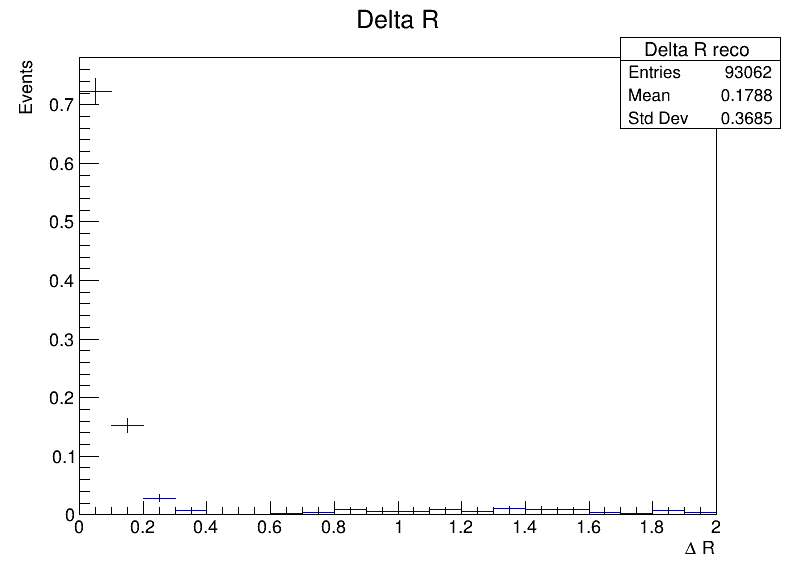

In [61]:
hist_DR_reco_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_reco_truth->DrawNormalized("");
canvas6->Draw();

<b>Excercises: 
7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).
8. Investigate the Large-R jets: 
    (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass.  

</b>

<b> 7. 

In [62]:
TCanvas *canvas8 = new TCanvas("Canvas8","",800,600);

In [63]:
TH1F *hist_pTjet_vs_pTtruth = new TH1F("pTjet/pTtrut","pTjet/pTtrut; #pTjet/pTtrut; Events",40,0,2);
TH1F *hist_pTjet_vs_pTtruth20 = new TH1F("pTjet/pTtrut20","pTjet/pTtrut; #pTjet/pTtrut; Events",40,0,2);
TH1F *hist_pTjet_vs_pTtruth100 = new TH1F("pTjet/pTtrut100","pTjet/pTtrut; #pTjet/pTtrut; Events",40,0,2);
TH1F *hist_pTjet_vs_pTtruth500 = new TH1F("pTjet/pTtrut500","pTjet/pTtrut; #pTjet/pTtrut; Events",40,0,2);

In [64]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        if(truthJet.DeltaR(recoJet)<0.3){
        hist_pTjet_vs_pTtruth20->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
        
        if(truthJet.DeltaR(recoJet)<0.3 && truth_R4_pt->at(0)>100000. ){
        hist_pTjet_vs_pTtruth100->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
        
        if(truthJet.DeltaR(recoJet)<0.3 && truth_R4_pt->at(0)>500000. ){
        hist_pTjet_vs_pTtruth500->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}        
    }
    }
}



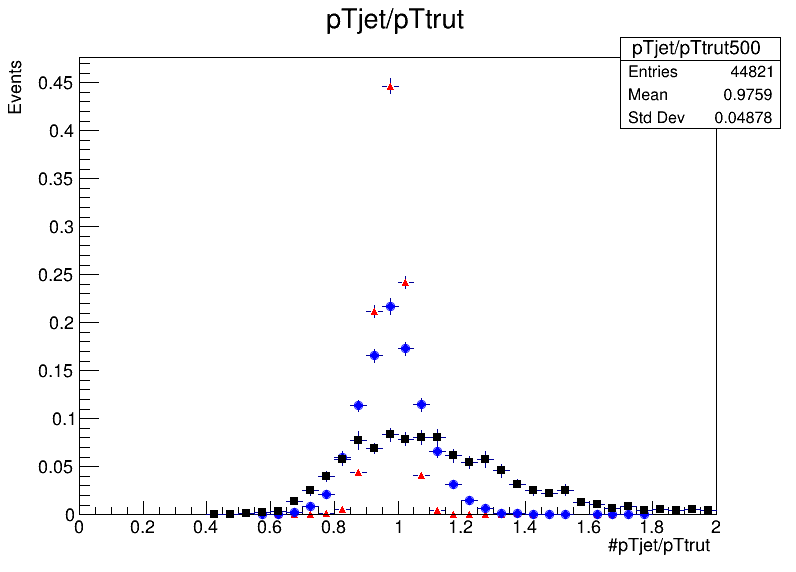

In [65]:
hist_pTjet_vs_pTtruth500->SetMarkerStyle(22);
hist_pTjet_vs_pTtruth500->SetMarkerColor(kRed);
hist_pTjet_vs_pTtruth500->DrawNormalized("");
//hist_pTjet_vs_pTtruth500->Draw("");
hist_pTjet_vs_pTtruth100->SetMarkerStyle(20);
hist_pTjet_vs_pTtruth100->SetMarkerColor(kBlue);
hist_pTjet_vs_pTtruth100->DrawNormalized("same");
//hist_pTjet_vs_pTtruth500->Draw("");
hist_pTjet_vs_pTtruth20->SetMarkerStyle(21);
hist_pTjet_vs_pTtruth20->SetMarkerColor(kBlack);
hist_pTjet_vs_pTtruth20->DrawNormalized("same");
//hist_pTjet_vs_pTtruth20->Draw("");
canvas8->Draw();

<b> Ahora coparemos los tracks pt con los truths pt

In [66]:
TCanvas *canvasb = new TCanvas("Canvasb","",800,600);

In [67]:
vector<float> *track_R4_eta;
vector<float> *track_R4_phi;
vector<float> *track_R4_m;

tree->SetBranchAddress("TrackJets_R4_eta", &track_R4_eta);
tree->SetBranchAddress("TrackJets_R4_phi", &track_R4_phi);
tree->SetBranchAddress("TrackJets_R4_m", &track_R4_m);

In [68]:
TH1F *hist_track_pTjet_vs_pTtruth = new TH1F("tracks pTjet/pTtrut","tracks pTjet/pTtrut; #pTjet/pTtrut; Events",40,0,2);
TH1F *hist_track_pTjet_vs_pTtruth20 = new TH1F("tracks pTjet/pTtrut20","tracks pTjet/pTtrut; #pTjet/pTtrut; Events",40,0,2);
TH1F *hist_track_pTjet_vs_pTtruth100 = new TH1F("tracks pTjet/pTtrut100","tracks pTjet/pTtrut; #pTjet/pTtrut; Events",40,0,2);
TH1F *hist_track_pTjet_vs_pTtruth500 = new TH1F("tracks pTjet/pTtrut500","tracks pTjet/pTtrut; #pTjet/pTtrut; Events",40,0,2);

In [69]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(track_R4_pt->size()!=0 ){
    TLorentzVector trackJet;
    trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));        
 
        if(truthJet.DeltaR(trackJet)<0.3){
        hist_track_pTjet_vs_pTtruth20->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
        
        if(truthJet.DeltaR(trackJet)<0.3 && truth_R4_pt->at(0)>100000. ){
        hist_track_pTjet_vs_pTtruth100->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
        
        if(truthJet.DeltaR(trackJet)<0.3 && truth_R4_pt->at(0)>500000. ){
        hist_track_pTjet_vs_pTtruth500->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}        
    }
    }
}

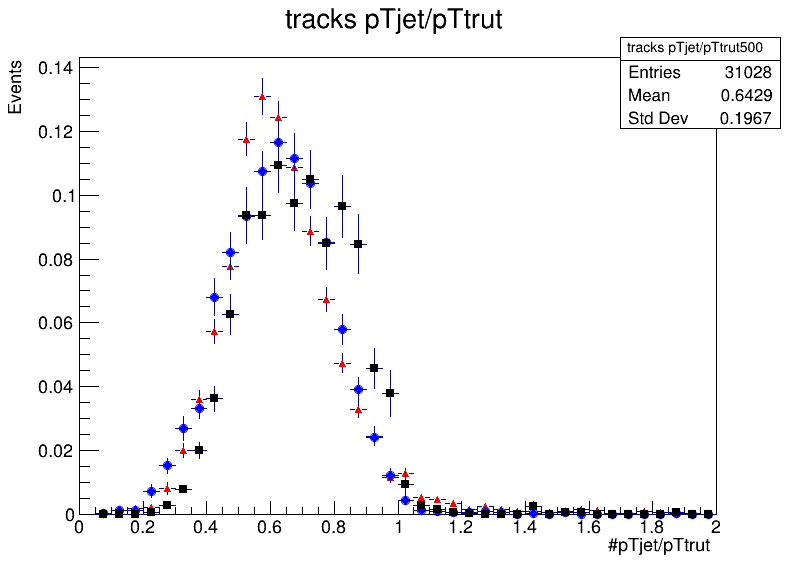

In [70]:
hist_track_pTjet_vs_pTtruth500->SetMarkerStyle(22);
hist_track_pTjet_vs_pTtruth500->SetMarkerColor(kRed);
hist_track_pTjet_vs_pTtruth500->DrawNormalized("");
//hist_pTjet_vs_pTtruth500->Draw("");
hist_track_pTjet_vs_pTtruth100->SetMarkerStyle(20);
hist_track_pTjet_vs_pTtruth100->SetMarkerColor(kBlue);
hist_track_pTjet_vs_pTtruth100->DrawNormalized("same");
//hist_pTjet_vs_pTtruth500->Draw("");
hist_track_pTjet_vs_pTtruth20->SetMarkerStyle(21);
hist_track_pTjet_vs_pTtruth20->SetMarkerColor(kBlack);
hist_track_pTjet_vs_pTtruth20->DrawNormalized("same");
//hist_pTjet_vs_pTtruth20->Draw("");
canvasb->Draw();

<b> 8. Investigate the Large-R jets: 
    
    (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass.
    
</b>

In [71]:
TCanvas *canvas9 = new TCanvas("Canvas9","",800,600);

In [72]:
vector<float> *reco_R10_pt;
vector<float> *reco_R10_Trimmed_pt;
vector<float> *truth_R10_pt;
vector<float> *truth_R10_Trimmed_pt;

tree->SetBranchAddress("RecoJets_R10_pt", &reco_R10_pt);
tree->SetBranchAddress("RecoJets_R10_Trimmed_pt", &reco_R10_Trimmed_pt);
tree->SetBranchAddress("TruthJets_R10_pt", &truth_R10_pt);
tree->SetBranchAddress("TruthJets_R10_Trimmed_pt", &truth_R10_Trimmed_pt);

In [73]:
TH1F *hist_leadrecoR10_pt = new TH1F("Lead RecoR10-jet","Leading R10jet pT; pT(GeV);Events",100,10,400);
TH1F *hist_leadrecoR10_Trimmed_pt = new TH1F("Lead RecoR10Trimmed-jet","Leading R10Trimmed jet pT; pT(GeV);Events",100,10,400);
TH1F *hist_leadtruthR10_pt = new TH1F("Lead truthR10-jet","Leading truthR10 jet pT; pT(GeV);Events",100,10,400);
TH1F *hist_leadtruthR10_Trimmed_pt = new TH1F("Lead truthR10Trimmed-jet","Leading truthR10Trimmed jet pT; pT(GeV);Events",100,10,400);


Loop and fill histograms

In [74]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R10_pt->size()>0){
    hist_leadrecoR10_pt->Fill(reco_R10_pt->at(0)/1000.,evtw);  

    }
    if(reco_R10_Trimmed_pt->size()>0){
    hist_leadrecoR10_Trimmed_pt->Fill(reco_R10_Trimmed_pt->at(0)/1000.,evtw);
    }
    if(truth_R10_pt->size()>0){
    hist_leadtruthR10_pt->Fill(truth_R10_pt->at(0)/1000.,evtw);
    }
    if(truth_R10_Trimmed_pt->size()>0){
    hist_leadtruthR10_Trimmed_pt->Fill(truth_R10_Trimmed_pt->at(0)/1000.,evtw);
    }
}

<b> 
        (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets
</b>    

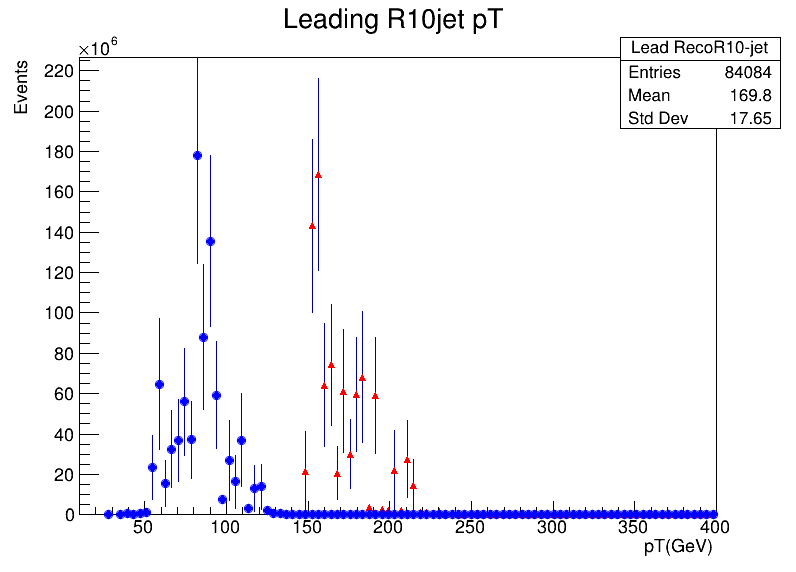

In [75]:
hist_leadrecoR10_pt->SetMarkerStyle(22);
hist_leadrecoR10_pt->SetMarkerColor(kRed);
hist_leadrecoR10_pt->Draw("");
hist_leadrecoR10_Trimmed_pt->SetMarkerStyle(20);
hist_leadrecoR10_Trimmed_pt->SetMarkerColor(kBlue);
hist_leadrecoR10_Trimmed_pt->Draw("same");
canvas9->Draw();

<b> 
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
</b> 

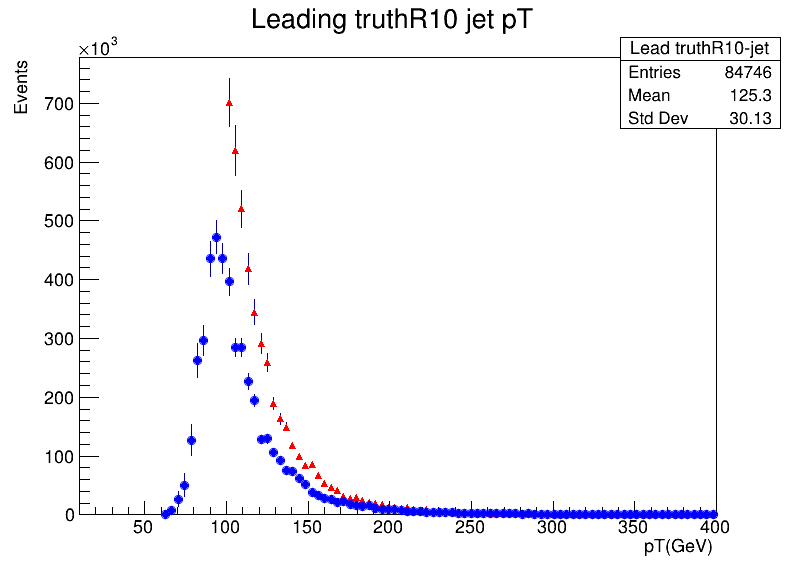

In [76]:
hist_leadtruthR10_pt->SetMarkerStyle(22);
hist_leadtruthR10_pt->SetMarkerColor(kRed);
hist_leadtruthR10_pt->Draw("");
hist_leadtruthR10_Trimmed_pt->SetMarkerStyle(20);
hist_leadtruthR10_Trimmed_pt->SetMarkerColor(kBlue);
hist_leadtruthR10_Trimmed_pt->Draw("same");
canvas9->Draw();

<b>
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass.


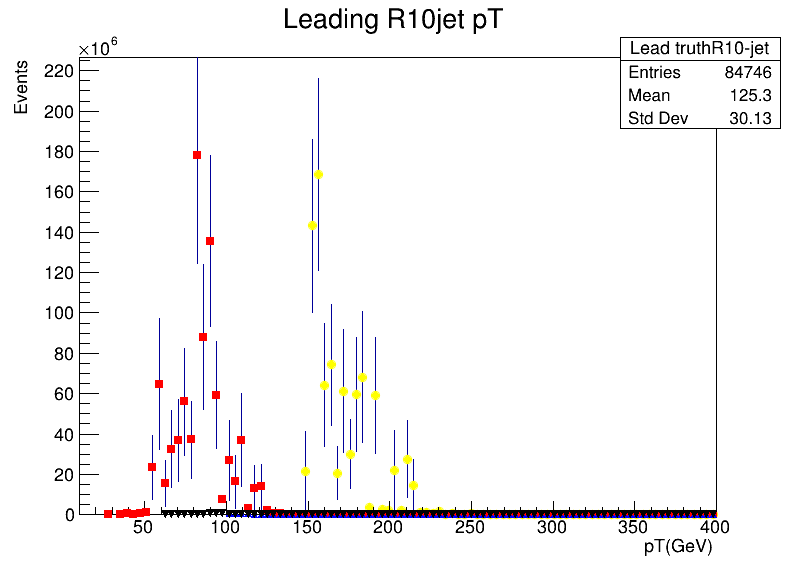

In [77]:
hist_leadrecoR10_pt->SetMarkerStyle(20);
hist_leadrecoR10_pt->SetMarkerColor(kYellow);
hist_leadrecoR10_pt->Draw("");
hist_leadrecoR10_Trimmed_pt->SetMarkerStyle(21);
hist_leadrecoR10_Trimmed_pt->SetMarkerColor(kRed);
hist_leadrecoR10_Trimmed_pt->Draw("same");
hist_leadtruthR10_pt->SetMarkerStyle(22);
hist_leadtruthR10_pt->SetMarkerColor(kBlue);
hist_leadtruthR10_pt->Draw("same");
hist_leadtruthR10_Trimmed_pt->SetMarkerStyle(23);
hist_leadtruthR10_Trimmed_pt->SetMarkerColor(kBlack);
hist_leadtruthR10_Trimmed_pt->Draw("same");
canvas9->Draw();

<b> Veamoslo en una escala Log en Y para apreciar mejor los 4 histogramas </b>

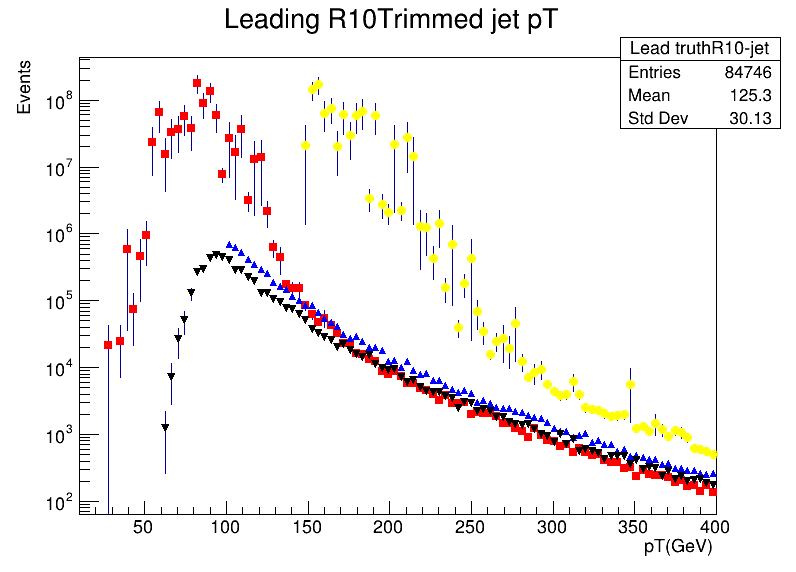

In [78]:
hist_leadrecoR10_Trimmed_pt->SetMarkerStyle(21);
hist_leadrecoR10_Trimmed_pt->SetMarkerColor(kRed);
hist_leadrecoR10_Trimmed_pt->Draw("");
hist_leadrecoR10_pt->SetMarkerStyle(20);
hist_leadrecoR10_pt->SetMarkerColor(kYellow);
hist_leadrecoR10_pt->Draw("same");
hist_leadtruthR10_pt->SetMarkerStyle(22);
hist_leadtruthR10_pt->SetMarkerColor(kBlue);
hist_leadtruthR10_pt->Draw("same");
hist_leadtruthR10_Trimmed_pt->SetMarkerStyle(23);
hist_leadtruthR10_Trimmed_pt->SetMarkerColor(kBlack);
hist_leadtruthR10_Trimmed_pt->Draw("same");
canvas9->SetLogy();
canvas9->Draw();

<b> 
    
    recoR10_pt           --> amarillo
    recoR10_Trimmed_pt   --> rojo 
    truthR10_pt          --> azul
    truthR10_Trimmed_pt  --> negro
    
</b>
    

<b> Se puede ver claramente que los Trimmed Jets son muchos menores, la forma de explicar la diferencia es decir que estos son Jets son armados tomando con algoritmos diferentes a la hora de analizar y filtrar los datos de tracks y calorimetros para combatir el pileup. Para los Trimmed Jets se tiene que se armman Jets grandes, luego estos Jets se "parten" en otros mini-Jets y se descartan los datos de los mini-Jets que no cumplan la condicion impuesta (por ejemplo una condicion de tener una fraccion de pT muy pequeñacon respecto al Jet grande original antes de "partirlo"). Esto hace que al elimiar tracks y despositos en las celdas del calorimetro considerados por este algoritmo como ruido que se tengan a la final menos Jets y estos sean de un pT menor.   
    
</b>    

 https://arxiv.org/abs/0912.1342     //    
 https://link.springer.com/article/10.1007/JHEP02(2010)084  (son el mismo)

In [79]:
TCanvas *canvas9 = new TCanvas("Canvas9","",800,600);

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas9


<b>
    (d) Make the same comparisson for the jet mass.

In [80]:
vector<float> *reco_R10_m;
vector<float> *reco_R10_Trimmed_m;
vector<float> *truth_R10_m;
vector<float> *truth_R10_Trimmed_m;

tree->SetBranchAddress("RecoJets_R10_m", &reco_R10_m);
tree->SetBranchAddress("RecoJets_R10_Trimmed_m", &reco_R10_Trimmed_m);
tree->SetBranchAddress("TruthJets_R10_m", &truth_R10_m);
tree->SetBranchAddress("TruthJets_R10_Trimmed_m", &truth_R10_Trimmed_m);

In [87]:
TH1F *hist_leadrecoR10_m = new TH1F("Lead RecoR10-jet m","Leading R10jet m; pT(GeV);Events",100,10,400);
TH1F *hist_leadrecoR10_Trimmed_m = new TH1F("Lead RecoR10Trimmed-jet m","Leading R10Trimmed jet m; m(GeV);Events",100,10,400);
TH1F *hist_leadtruthR10_m = new TH1F("Lead truthR10-jet m","Leading truthR10 jet m; pT(GeV);Events",100,10,400);
TH1F *hist_leadtruthR10_Trimmed_m = new TH1F("Lead truthR10Trimmed-jet m","Leading truthR10Trimmed jet m; m(GeV);Events",100,10,400);


Warning in <TFile::Append>: Replacing existing TH1: Lead RecoR10-jet m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead RecoR10Trimmed-jet m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead truthR10-jet m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead truthR10Trimmed-jet m (Potential memory leak).


In [88]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R10_m->size()>0){
    hist_leadrecoR10_m->Fill(reco_R10_m->at(0)/1000.,evtw);  
    }
    if(reco_R10_Trimmed_m->size()>0){
    hist_leadrecoR10_Trimmed_m->Fill(reco_R10_Trimmed_m->at(0)/1000.,evtw);
    }
    if(truth_R10_m->size()>0){
    hist_leadtruthR10_m->Fill(truth_R10_m->at(0)/1000.,evtw);
    }
    if(truth_R10_Trimmed_m->size()>0){
    hist_leadtruthR10_Trimmed_m->Fill(truth_R10_Trimmed_m->at(0)/1000.,evtw);
    }
}

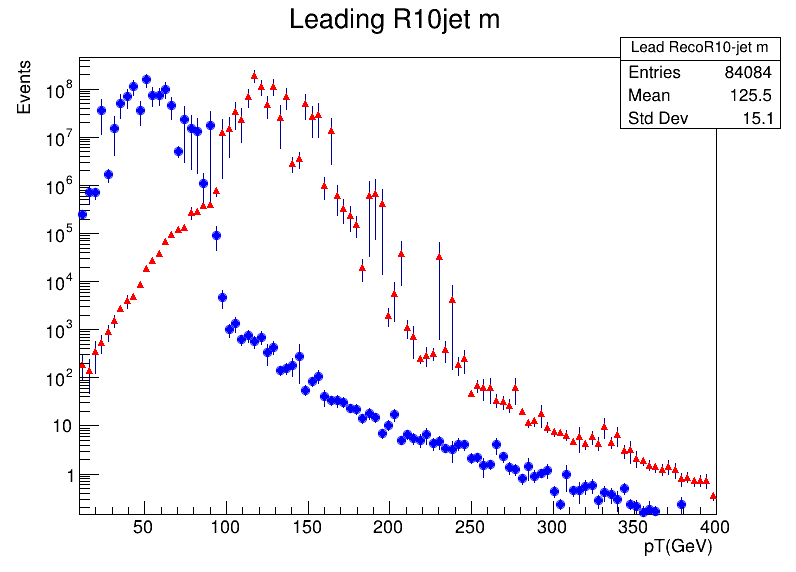

In [89]:
hist_leadrecoR10_m->SetMarkerStyle(22);
hist_leadrecoR10_m->SetMarkerColor(kRed);
hist_leadrecoR10_m->Draw("");
hist_leadrecoR10_Trimmed_m->SetMarkerStyle(20);
hist_leadrecoR10_Trimmed_m->SetMarkerColor(kBlue);
hist_leadrecoR10_Trimmed_m->Draw("same");
canvas9->Draw();

<b> 
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
</b> 

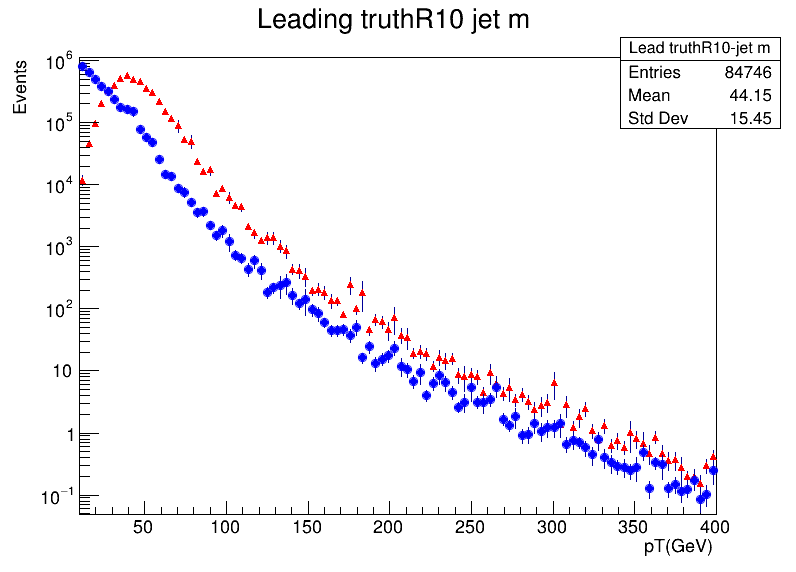

In [90]:
hist_leadtruthR10_m->SetMarkerStyle(22);
hist_leadtruthR10_m->SetMarkerColor(kRed);
hist_leadtruthR10_m->Draw("");
hist_leadtruthR10_Trimmed_m->SetMarkerStyle(20);
hist_leadtruthR10_Trimmed_m->SetMarkerColor(kBlue);
hist_leadtruthR10_Trimmed_m->Draw("same");
canvas9->Draw();

<b>
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass.


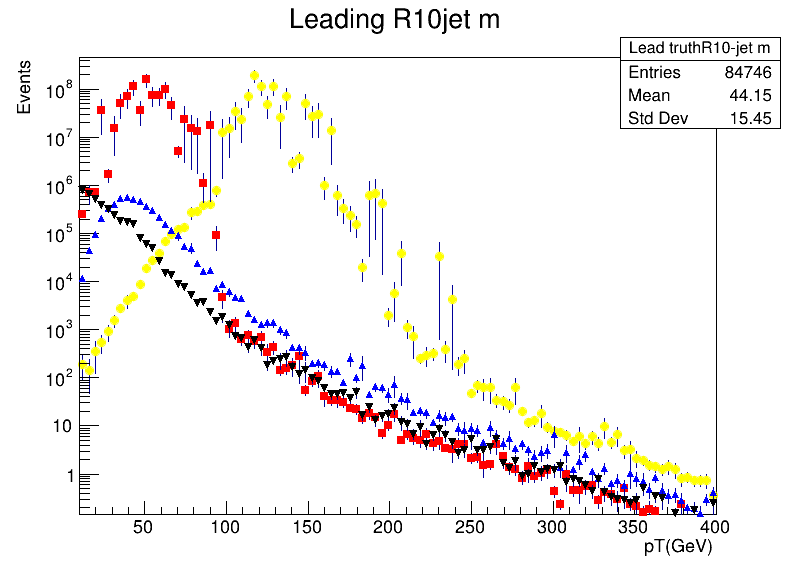

In [91]:
hist_leadrecoR10_m->SetMarkerStyle(20);
hist_leadrecoR10_m->SetMarkerColor(kYellow);
hist_leadrecoR10_m->Draw("");
hist_leadrecoR10_Trimmed_m->SetMarkerStyle(21);
hist_leadrecoR10_Trimmed_m->SetMarkerColor(kRed);
hist_leadrecoR10_Trimmed_m->Draw("same");
hist_leadtruthR10_m->SetMarkerStyle(22);
hist_leadtruthR10_m->SetMarkerColor(kBlue);
hist_leadtruthR10_m->Draw("same");
hist_leadtruthR10_Trimmed_m->SetMarkerStyle(23);
hist_leadtruthR10_Trimmed_m->SetMarkerColor(kBlack);
hist_leadtruthR10_Trimmed_m->Draw("same");
canvas9->Draw();

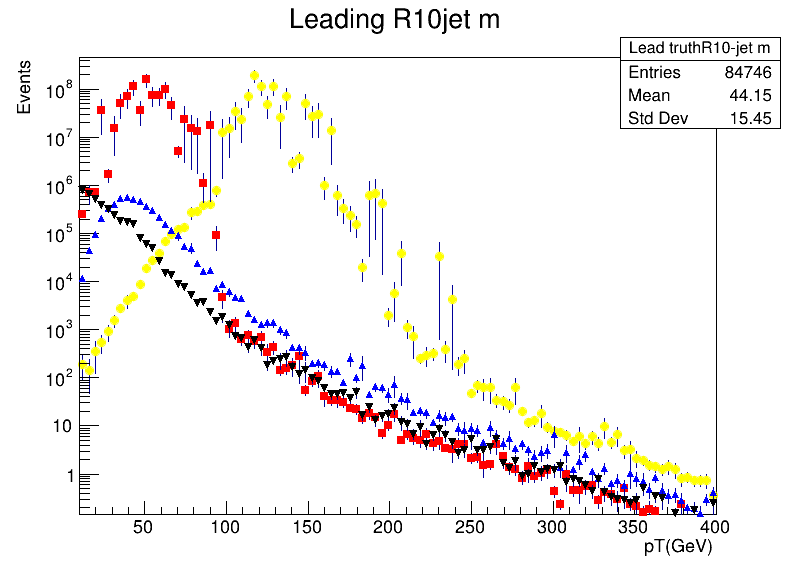

In [92]:
hist_leadrecoR10_m->SetMarkerStyle(20);
hist_leadrecoR10_m->SetMarkerColor(kYellow);
hist_leadrecoR10_m->Draw("");
hist_leadrecoR10_Trimmed_m->SetMarkerStyle(21);
hist_leadrecoR10_Trimmed_m->SetMarkerColor(kRed);
hist_leadrecoR10_Trimmed_m->Draw("same");
hist_leadtruthR10_m->SetMarkerStyle(22);
hist_leadtruthR10_m->SetMarkerColor(kBlue);
hist_leadtruthR10_m->Draw("same");
hist_leadtruthR10_Trimmed_m->SetMarkerStyle(23);
hist_leadtruthR10_Trimmed_m->SetMarkerColor(kBlack);
hist_leadtruthR10_Trimmed_m->Draw("same");
canvas9->SetLogy();
canvas9->Draw();